In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.datasets import load_boston

In [39]:
Boston=pd.read_csv("boston_house.csv")
col=Boston.columns.str.upper()
Boston.columns=col
Boston.rename(columns={"MEDV":"price"},inplace=True)
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
df=Boston.copy()
df.info()
#as shown all of them is float and non_null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [41]:
# summarizing the stats of dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## exploratary data analysis

### correlation

In [42]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:xlabel='RM', ylabel='price'>

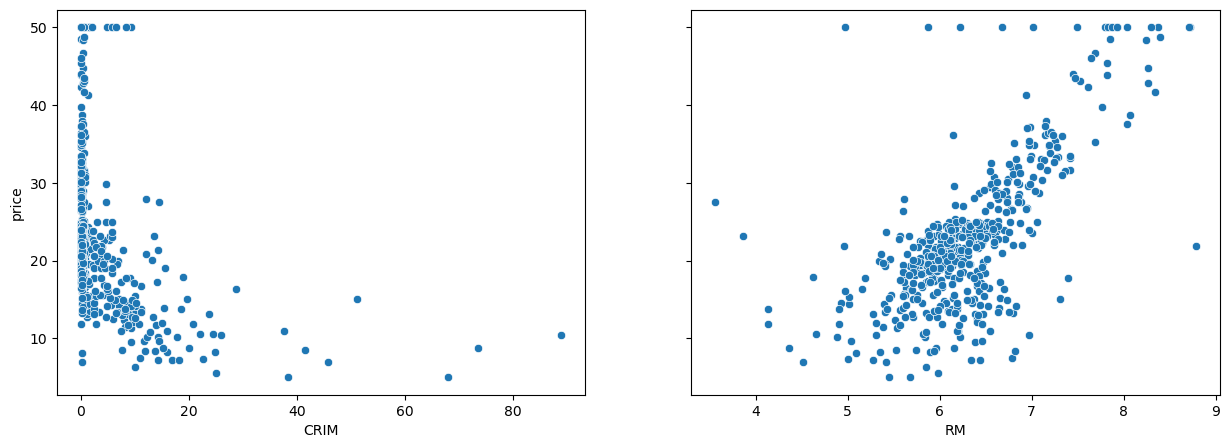

In [43]:
fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0] ,x=df["CRIM"],y=df["price"])
sns.scatterplot(ax=axes[1] ,x=df["RM"],y=df["price"])

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

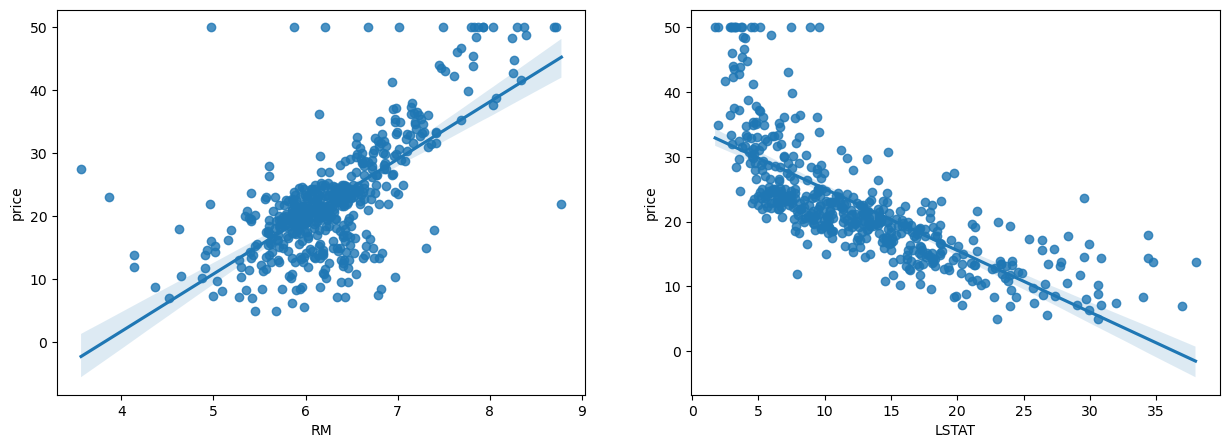

In [44]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.regplot(x=df["RM"],y=df["price"],ax=axes[0],order=1)
sns.regplot(x=df["LSTAT"],y=df["price"],ax=axes[1])

In [45]:
# dependent and independent data

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [46]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
(x_train.shape,x_test.shape)

((354, 13), (152, 13))

In [48]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [62]:
x=x_train.iloc[1]
x=np.array(x).reshape(1,-1)
scalar.fit_transform(x)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
(x_train.shape,x_test.shape)

((354, 13), (152, 13))

## model training

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
model.score(x_test,y_test)

0.658497227404151

In [16]:
print("coeficients of model is {} .\n interception is {} \n parameter of model is {}".format(model.coef_,model.intercept_,model.get_params()))

coeficients of model is [-1.252809    1.56150248 -0.16861008  0.37449384 -1.7776332   2.23783886
  0.3168073  -3.27712377  2.69471035 -2.10285702 -1.74689193  1.22356691
 -3.83454078] .
 interception is 21.971186440677965 
 parameter of model is {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [17]:
y_predicted=model.predict(x_test)

<AxesSubplot:xlabel='price'>

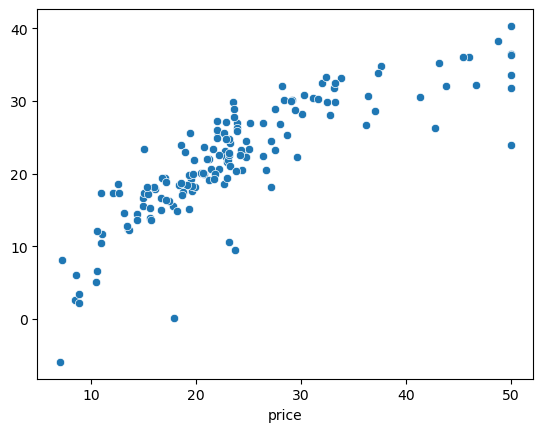

In [18]:
### plot a scatter plot for prediction

sns.scatterplot(y=y_predicted,x=y_test)

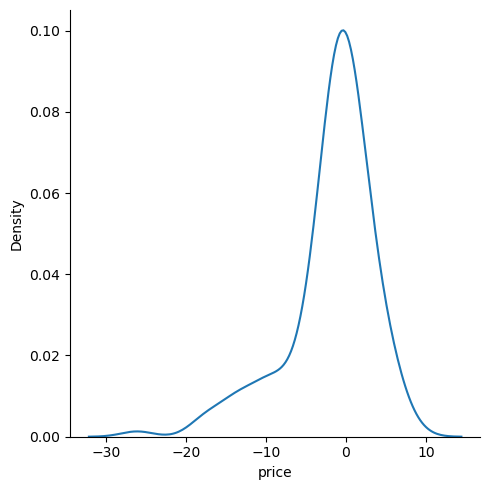

In [19]:
### plot the residual
residual=y_predicted-y_test
sns.displot(residual,kind="kde")

In [20]:
from sklearn.metrics import r2_score

coefficient_determination=r2_score(y_test,y_predicted)
print(coefficient_determination)

0.658497227404151


## dump models

In [2]:
import pickle

pickle.dump(model,open("regmodel.pkl","wb"))

NameError: name 'model' is not defined

In [3]:
reg=pickle.load(open("regmodel.pkl","rb"))

In [5]:
x=[[2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9600e+00, 2.0000e+00, 2.4200e+02,
        2.7800e+01, 3.9283e+02, 4.0300e+00]]
reg.predict(x)

array([25.308908], dtype=float32)

In [63]:
scalar1=pickle.dump(scalar,open("scalarmodel.pkl","wb"))

In [67]:
scalee=pickle.load(open("scalarmodel.pkl","rb"))

In [68]:
x=[[2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9600e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]]

In [69]:
x

[[0.02729,
  0.0,
  7.07,
  0.0,
  0.469,
  7.185,
  61.1,
  4.96,
  2.0,
  242.0,
  17.8,
  392.83,
  4.03]]

In [70]:
x1=scalee.fit_transform(x)

In [71]:
x1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])